In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline



In [2]:
data_path = '/Users/nipunnirman/Documents/GitHub/Dementia-Prediction-Machine-Learning-Model/data/Dementia Prediction Dataset copy.csv'


df = pd.read_csv(data_path)




df.head()

,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,NACCDAYS,NACCFDYS,NACCCORE,NACCREAS,NACCREFR,BIRTHMO,BIRTHYR,SEX,HISPANIC,HISPOR,HISPORX,RACE,RACEX,RACESEC,RACESECX,RACETER,RACETERX,PRIMLANG,PRIMLANX,EDUC,MARISTAT,NACCLIVS,INDEPEND,RESIDENC,HANDED,INBIRMO,INBIRYR,INSEX,NEWINF,INHISP,INHISPOR,INHISPOX,NACCNINR,INRACE,INRACEX,INRASEC,INRASECX,INRATER,INRATERX,INEDUC,INRELTO,INRELTOX,INKNOWN,INLIVWTH,INVISITS,INCALLS,INRELY,NACCFAM,NACCMOM,NACCDAD,NACCAM,NACCAMX,NACCAMS,NACCAMSX,NACCFM,NACCFMX,NACCFMS,NACCFMSX,NACCOM,NACCOMX,NACCOMS,NACCOMSX,NACCFADM,NACCFFTD,ANYMEDS,DRUG1,DRUG2,DRUG3,DRUG4,DRUG5,DRUG6,DRUG7,DRUG8,DRUG9,DRUG10,DRUG11,DRUG12,DRUG13,DRUG14,DRUG15,DRUG16,DRUG17,DRUG18,DRUG19,DRUG20,DRUG21,DRUG22,DRUG23,DRUG24,DRUG25,DRUG26,DRUG27,DRUG28,DRUG29,DRUG30,DRUG31,DRUG32,DRUG33,DRUG34,DRUG35,DRUG36,DRUG37,DRUG38,DRUG39,DRUG40,TOBAC30,TOBAC100,SMOKYRS,PACKSPER,QUITSMOK,ALCOCCAS,ALCFREQ,CVHATT,HATTMULT,HATTYEAR,CVAFIB,CVANGIO,CVBYPASS,CVPACDEF,CVPACE,CVCHF,CVANGINA,CVHVALVE,CVOTHR,CVOTHRX,CBSTROKE,STROKMUL,NACCSTYR,CBTIA,TIAMULT,NACCTIYR,PD,PDYR,PDOTHR,PDOTHRYR,SEIZURES,NACCTBI,TBI,TBIBRIEF,TRAUMBRF,TBIEXTEN,TRAUMEXT,TBIWOLOS,TRAUMCHR,TBIYEAR,NCOTHR,NCOTHRX,DIABETES,DIABTYPE,HYPERTEN,HYPERCHO,B12DEF,THYROID,ARTHRIT,ARTHTYPE,ARTHTYPX,ARTHUPEX,ARTHLOEX,ARTHSPIN,ARTHUNK,INCONTU,INCONTF,APNEA,RBD,INSOMN,OTHSLEEP,OTHSLEEX,ALCOHOL,ABUSOTHR,ABUSX,PTSD,BIPOLAR,SCHIZ,DEP2YRS,DEPOTHR,ANXIETY,OCD,NPSYDEV,PSYCDIS,PSYCDISX,HEIGHT,WEIGHT,BPSYS,BPDIAS,HRATE,VISION,VISCORR,VISWCORR,HEARING,HEARAID,HEARWAID,ABRUPT,STEPWISE,SOMATIC,EMOT,HXHYPER,HXSTROKE,FOCLSYM,FOCLSIGN,HACHIN,CVDCOG,STROKCOG,CVDIMAG,CVDIMAG1,CVDIMAG2,CVDIMAG3,CVDIMAG4,CVDIMAGX,PDNORMAL,SPEECH,SPEECHX,FACEXP,FACEXPX,TRESTFAC,TRESTFAX,TRESTRHD,TRESTRHX,TRESTLHD,TRESTLHX,TRESTRFT,TRESTRFX,TRESTLFT,TRESTLFX,TRACTRHD,TRACTRHX,TRACTLHD,TRACTLHX,RIGDNECK,RIGDNEX,RIGDUPRT,RIGDUPRX,RIGDUPLF,RIGDUPLX,RIGDLORT,RIGDLORX,RIGDLOLF,RIGDLOLX,TAPSRT,TAPSRTX,TAPSLF,TAPSLFX,HANDMOVR,HANDMVRX,HANDMOVL,HANDMVLX,HANDALTR,HANDATRX,HANDALTL,HANDATLX,LEGRT,LEGRTX,LEGLF,LEGLFX,ARISING,ARISINGX,POSTURE,POSTUREX,GAIT,GAITX,POSSTAB,POSSTABX,BRADYKIN,BRADYKIX,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRSUM,CDRGLOB,COMPORT,CDRLANG,NPIQINF,NPIQINFX,DEL,DELSEV,HALL,HALLSEV,AGIT,AGITSEV,DEPD,DEPDSEV,ANX,ANXSEV,ELAT,ELATSEV,APA,APASEV,DISN,DISNSEV,IRR,IRRSEV,MOT,MOTSEV,NITE,NITESEV,APP,APPSEV,NOGDS,SATIS,DROPACT,EMPTY,BORED,SPIRITS,AFRAID,HAPPY,HELPLESS,STAYHOME,MEMPROB,WONDRFUL,WRTHLESS,ENERGY,HOPELESS,BETTER,NACCGDS,BILLS,TAXES,SHOPPING,GAMES,STOVE,MEALPREP,EVENTS,PAYATTN,REMDATES,TRAVEL,NACCNREX,NORMEXAM,FOCLDEF,GAITDIS,EYEMOVE,PARKSIGN,RESTTRL,RESTTRR,SLOWINGL,SLOWINGR,RIGIDL,RIGIDR,BRADY,PARKGAIT,POSTINST,CVDSIGNS,CORTDEF,SIVDFIND,CVDMOTL,CVDMOTR,CORTVISL,CORTVISR,SOMATL,SOMATR,POSTCORT,PSPCBS,EYEPSP,DYSPSP,AXIALPSP,GAITPSP,APRAXSP,APRAXL,APRAXR,CORTSENL,CORTSENR,ATAXL,ATAXR,ALIENLML,ALIENLMR,DYSTONL,DYSTONR,MYOCLLT,MYOCLRT,ALSFIND,GAITNPH,OTHNEUR,OTHNEURX,B9CHG,DECSUB,DECIN,DECCLIN,DECCLCOG,COGMEM,COGORI,COGJUDG,COGLANG,COGVIS,COGATTN,COGFLUC,COGFLAGO,COGOTHR,COGOTHRX,NACCCOGF,NACCCGFX,COGMODE,COGMODEX,DECAGE,DECCLBE,BEAPATHY,BEDEP,BEVHALL,BEVWELL,BEVHAGO,BEAHALL,BEDEL,BEDISIN,BEIRRIT,BEAGIT,BEPERCH,BEREM,BEREMAGO,BEANX,BEOTHR,BEOTHRX,NACCBEHF,NACCBEFX,BEMODE,BEMODEX,BEAGE,DECCLMOT,MOGAIT,MOFALLS,MOTREM,MOSLOW,NACCMOTF,MOMODE,MOMODEX,MOMOPARK,PARKAGE,MOMOALS,ALSAGE,MOAGE,COURSE,FRSTCHG,LBDEVAL,FTLDEVAL,MMSECOMP,MMSELOC,MMSELAN,MMSELANX,MMSEVIS,MMSEHEAR,MMSEORDA,MMSEORLO,PENTAGON,NACCMMSE,NPSYCLOC,NPSYLAN,NPSYLANX,LOGIMO,LOGIDAY,LOGIYR,LOGIPREV,LOGIMEM,MEMUNITS,MEMTIME,UDSBENTC,UDSBENTD,UDSBENRS,DIGIF,DIGIFLEN,DIGIB,DIGIBLEN,ANIMALS,VEG,TRAILA,TRAILARR,TRAILALI,TRAILB,TRAILBRR,TRAILBLI,WAIS,BOSTON,UDSVERFC,UDSVERFN,UDSVERNF,UDSVERLC,UDSVERLR,UDSVERLN,UDSVERTN,UDSVERTE,UDSVERTI,COGSTAT,NACCC1,MOCACOMP,MOCAREAS,MOCALOC,MOCALAN,MOCALANX,MOCAVIS,MOCAHEAR,MOCATOTS,MOCATRAI,MOCACUBE,MOCACLOC,MOCACLON,MOCACLOH,MOCANAMI,MOCAREGI,MOCADIGI,MOCALETT,MOCASER7,MOCAREPE,MOCAFL

In [4]:

NON_MEDICAL_FEATURES = [
    # Visit info
    'NACCID', 'NACCADC', 'PACKET', 'FORMVER',
    'VISITMO', 'VISITDAY', 'VISITYR',
    'NACCVNUM', 'NACCAVST', 'NACCNVST', 'NACCDAYS', 'NACCFDYS',
    # Demographics
    'BIRTHMO', 'BIRTHYR', 'NACCAGE', 'NACCAGEB', 'SEX',
    'HISPANIC', 'HISPOR', 'HISPORX',
    'RACE', 'RACEX', 'RACESEC', 'RACESECX', 'RACETER', 'RACETERX', 'NACCNIHR',
    'PRIMLANG', 'PRIMLANX',
    'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC',
    'HANDED', 'NACCREAS', 'NACCREFR',
    # Co-participant
    'INBIRMO', 'INBIRYR', 'INSEX', 'NEWINF',
    'INHISP', 'INHISPOR', 'INHISPOX',
    'INRACE', 'INRACEX', 'INRASEC', 'INRASECX', 'INRATER', 'INRATERX',
    'INEDUC', 'INRELTO', 'INRELTOX', 'INKNOWN', 'INLIVWTH',
    # Family history - CRITICAL
    'NACCFAM', 'NACCMOM', 'NACCDAG', 'NACCFAD',
    'NACCFADM', 'NACCAM', 'NACCAMX', 'NACCAMS', 'NACCAMSX',
    'NACCFFTD', 'NACCFM', 'NACCFMX', 'NACCFMS', 'NACCFMSX',
    # Other
    'NACCBMI', 'NACCUDSD',
]


available_features = [f for f in NON_MEDICAL_FEATURES if f in df.columns]
print(f"\n Available features: {len(available_features)}")


 Available features: 69


In [6]:
TARGET_CANDIDATES = ['DEMENTED', 'NORMCOG', 'NACCALZD', 'CDRGLOB']
TARGET = None

for candidate in TARGET_CANDIDATES:
    if candidate in df.columns:
        TARGET = candidate
        break

# Create from CDRGLOB if needed
if TARGET is None and 'CDRGLOB' in df.columns:
    df['DEMENTIA_BINARY'] = (df['CDRGLOB'] >= 0.5).astype(int)
    TARGET = 'DEMENTIA_BINARY'


In [7]:
df_work = df[available_features + [TARGET]].copy()


df_work = df_work[df_work[TARGET].notna()]

print(f" Working dataset: {df_work.shape[0]:,} rows, {df_work.shape[1]:,} columns")

 Working dataset: 195,196 rows, 70 columns


Handle NACC Special Codes

In [8]:



MISSING_CODES = [-4, 88, 888, 8888, 99, 999, 9999]

print(f"Special codes to convert to NaN: {MISSING_CODES}\n")

# Count occurrences before replacement
codes_found = {}
for code in MISSING_CODES:
    count = (df_work == code).sum().sum()
    if count > 0:
        codes_found[code] = count

if codes_found:
    print("Special codes found:")
    for code, count in sorted(codes_found.items()):
        print(f"  {code:6d}: {count:,} occurrences")
    
    total_special = sum(codes_found.values())
    print(f"\n  Total: {total_special:,} special code values")
else:
    print(" No special codes found")

Special codes to convert to NaN: [-4, 88, 888, 8888, 99, 999, 9999]

Special codes found:
      -4: 1,441,907 occurrences
      88: 740,688 occurrences
      99: 21,307 occurrences
     888: 67 occurrences
     999: 1,081 occurrences
    9999: 5,547 occurrences

  Total: 2,210,597 special code values


In [10]:
print("\nReplacing special codes with NaN...")

for col in df_work.columns:
    if col != TARGET:
        df_work[col] = df_work[col].replace(MISSING_CODES, np.nan)

print("Special codes converted to NaN")
print(f"   Missing values after conversion: {df_work.isnull().sum().sum():,}")


Replacing special codes with NaN...
Special codes converted to NaN
   Missing values after conversion: 4,832,118


Analyze Missing Values

In [11]:


# Calculate missing statistics
missing_stats = pd.DataFrame({
    'Column': df_work.columns,
    'Missing_Count': df_work.isnull().sum(),
    'Missing_Percentage': (df_work.isnull().sum() / len(df_work) * 100).round(2),
    'Data_Type': df_work.dtypes
}).sort_values('Missing_Percentage', ascending=False)

# Overall statistics
total_cells = df_work.shape[0] * df_work.shape[1]
missing_cells = df_work.isnull().sum().sum()
missing_pct = (missing_cells / total_cells * 100)

print(f"Overall Missing Data:")
print(f"  Total cells: {total_cells:,}")
print(f"  Missing cells: {missing_cells:,}")
print(f"  Missing percentage: {missing_pct:.2f}%")

print(f"\nFeatures with missing data: {(missing_stats['Missing_Count'] > 0).sum()}")
print(f"\nTop 10 features with most missing data:")
print(missing_stats[missing_stats['Missing_Count'] > 0].head(10).to_string())

 Step 2: Analyzing missing values...

Overall Missing Data:
  Total cells: 13,663,720
  Missing cells: 4,832,118
  Missing percentage: 35.36%

Features with missing data: 44

Top 10 features with most missing data:
            Column  Missing_Count  Missing_Percentage Data_Type
RACETERX  RACETERX         195160               99.98    object
INRATERX  INRATERX         195137               99.97    object
INHISPOX  INHISPOX         194958               99.88    object
INRASECX  INRASECX         194899               99.85    object
INRATER    INRATER         194901               99.85   float64
RACESECX  RACESECX         194813               99.80    object
HISPORX    HISPORX         194669               99.73    object
RACETER    RACETER         194085               99.43   float64
INRELTOX  INRELTOX         193644               99.20    object
INRACEX    INRACEX         193608               99.19    object


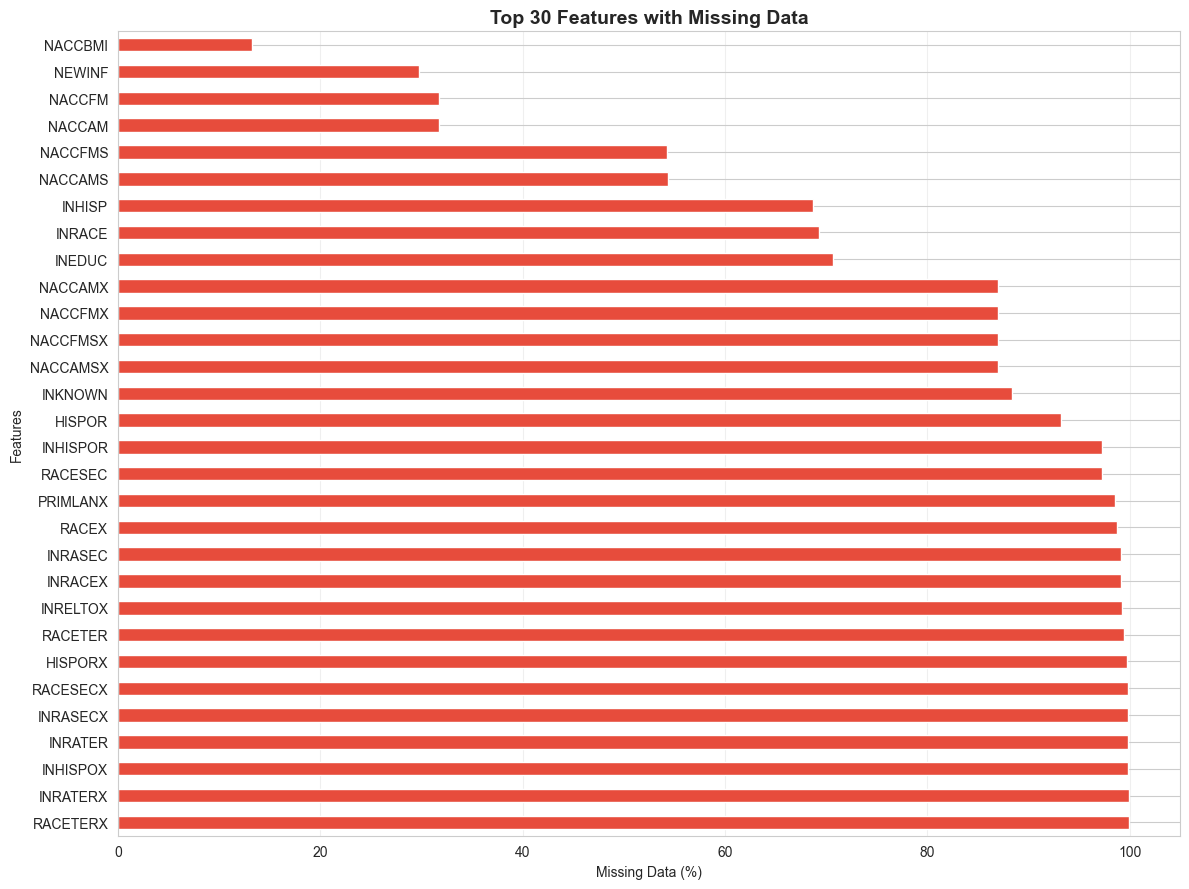

 Saved: outputs/02_missing_data.png


In [13]:
missing_pct = (df_work.isnull().sum() / len(df_work) * 100).sort_values(ascending=False)
missing_pct = missing_pct[missing_pct > 0]

if len(missing_pct) > 0:
    plt.figure(figsize=(12, max(6, len(missing_pct[:30]) * 0.3)))
    missing_pct.head(30).plot(kind='barh', color='#e74c3c')
    plt.title('Top 30 Features with Missing Data', fontsize=14, fontweight='bold')
    plt.xlabel('Missing Data (%)')
    plt.ylabel('Features')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('outputs/02_missing_data.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(" Saved: outputs/02_missing_data.png")
else:
    print(" No missing data to visualize")

Remove High-Missing Features

In [14]:

MISSING_THRESHOLD = 50.0

high_missing = missing_stats[missing_stats['Missing_Percentage'] > MISSING_THRESHOLD]
cols_to_remove = high_missing['Column'].tolist()

# Don't remove target
if TARGET in cols_to_remove:
    cols_to_remove.remove(TARGET)

if cols_to_remove:
    print(f"Removing {len(cols_to_remove)} features with >{MISSING_THRESHOLD}% missing:")
    for col in cols_to_remove:
        pct = high_missing[high_missing['Column'] == col]['Missing_Percentage'].values[0]
        print(f"  - {col}: {pct:.1f}% missing")
    
    df_work = df_work.drop(columns=cols_to_remove)
    print(f"Removed {len(cols_to_remove)} high-missing features")
else:
    print(f" No features with >{MISSING_THRESHOLD}% missing")

print(f"\nRemaining features: {df_work.shape[1] - 1}  (+ target)")

Removing 26 features with >50.0% missing:
  - RACETERX: 100.0% missing
  - INRATERX: 100.0% missing
  - INHISPOX: 99.9% missing
  - INRASECX: 99.8% missing
  - INRATER: 99.8% missing
  - RACESECX: 99.8% missing
  - HISPORX: 99.7% missing
  - RACETER: 99.4% missing
  - INRELTOX: 99.2% missing
  - INRACEX: 99.2% missing
  - INRASEC: 99.1% missing
  - RACEX: 98.8% missing
  - PRIMLANX: 98.6% missing
  - RACESEC: 97.3% missing
  - INHISPOR: 97.2% missing
  - HISPOR: 93.2% missing
  - INKNOWN: 88.4% missing
  - NACCAMSX: 87.0% missing
  - NACCFMSX: 87.0% missing
  - NACCFMX: 87.0% missing
  - NACCAMX: 87.0% missing
  - INEDUC: 70.7% missing
  - INRACE: 69.3% missing
  - INHISP: 68.7% missing
  - NACCAMS: 54.3% missing
  - NACCFMS: 54.3% missing
Removed 26 high-missing features

Remaining features: 43  (+ target)


Remove Duplicates

In [16]:

initial_rows = len(df_work)
duplicates = df_work.duplicated().sum()

print(f"Duplicate rows found: {duplicates}")

if duplicates > 0:
    print(f"  Removing {duplicates} duplicate rows...")
    df_work = df_work.drop_duplicates()
    print(f"   Removed {duplicates} duplicates")
else:
    print(f"  No duplicates found")

print(f"\nRows after duplicate removal: {len(df_work):,}")

Duplicate rows found: 0
  No duplicates found

Rows after duplicate removal: 195,196


Data Type Optimization

In [18]:


memory_before = df_work.memory_usage(deep=True).sum() / 1024**2
print(f"Memory before optimization: {memory_before:.2f} MB")


float_cols = df_work.select_dtypes(include=['float64']).columns
for col in float_cols:
    if col != TARGET:
        df_work[col] = df_work[col].astype('float32')


int_cols = df_work.select_dtypes(include=['int64']).columns
for col in int_cols:
    if col != TARGET:
       
        if df_work[col].max() < 2147483647 and df_work[col].min() > -2147483648:
            df_work[col] = df_work[col].astype('int32')

memory_after = df_work.memory_usage(deep=True).sum() / 1024**2
memory_saved = memory_before - memory_after
memory_saved_pct = (memory_saved / memory_before * 100)



Memory before optimization: 55.29 MB


In [20]:



summary = {
    'original_rows': len(df),
    'original_columns': len(df.columns),
    'cleaned_rows': len(df_work),
    'cleaned_columns': len(df_work.columns),
    'rows_removed': len(df) - len(df_work),
    'features_removed': len(cols_to_remove) if cols_to_remove else 0,
    'special_codes_converted': total_special if codes_found else 0,
    'duplicates_removed': duplicates,
    'final_missing_percentage': round((df_work.isnull().sum().sum() / (df_work.shape[0] * df_work.shape[1]) * 100), 2),
    'memory_saved_mb': round(memory_saved, 2),
    'target_variable': TARGET
}

for key, value in summary.items():
    print(f"  {key}: {value}")



  original_rows: 195196
  original_columns: 1024
  cleaned_rows: 195196
  cleaned_columns: 44
  rows_removed: 0
  features_removed: 26
  special_codes_converted: 2210597
  duplicates_removed: 0
  final_missing_percentage: 3.2
  memory_saved_mb: 0.0
  target_variable: DEMENTED


In [21]:
output_path = 'data/cleaned_data.csv'
df_work.to_csv(output_path, index=False)